In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import re

In [2]:
data = pd.read_csv("Obfuscated-MalMem2022.csv")
data.sample(frac=1, axis=1)

,ldrmodules.not_in_mem,dlllist.avg_dlls_per_proc,pslist.nproc,psxview.not_in_session_false_avg,malfind.ninjections,callbacks.nanonymous,psxview.not_in_deskthrd,handles.ntimer,pslist.avg_handlers,psxview.not_in_csrss_handles_false_avg,svcscan.kernel_drivers,callbacks.ngeneric,Class,malfind.commitCharge,svcscan.fs_drivers,pslist.avg_threads,pslist.nppid,handles.nevent,psxview.not_in_pslist,handles.nkey,handles.nmutant,psxview.not_in_session,psxview.not_in_deskthrd_false_avg,handles.nhandles,ldrmodules.not_in_mem_avg,pslist.nprocs64bit,psxview.not_in_pspcid_list_false_avg,callbacks.ncallbacks,handles.ndesktop,ldrmodules.not_in_init,handles.avg_handles_per_proc,svcscan.shared_process_services,dlllist.ndlls,psxview.not_in_ethread_pool,psxview.not_in_pslist_false_avg,svcscan.process_services,handles.nsection,svcscan.interactive_process_services,psxview.not_in_pspcid_list,psxview.not_in_csrss_handles,handles.nport,ldrmodules.not_in_load_avg,Category,psxview.not_in_eprocess_pool,handles.ndirectory,ldrmodules.not_in_load,handles.nsemaphore,malfind.uniqueInjections,svcscan.nactive,handles.nfile,handles.nthread,modules.nmodules,psxview.not_in_eprocess_pool_false_avg,malfind.protection,psxview.not_in_ethread_pool_false_avg,ldrmodules.not_in_init_avg,svcscan.nservices
0,53,38.500000,45,0.085106,5,0,9,125,202.844444,0.148936,221,8,Benign,21,26,10.555556,17,3161,2,716,257,4,0.191489,9129,0.030372,0,0.042553,87,46,95,212.302326,116,1694,3,0.042553,24,184,0,2,7,0,0.030372,Benign,0,104,53,671,1.250000,121,670,887,138,0.0,30,0.063830,0.054441,389
1,77,44.127660,47,0.042553,12,0,6,148,242.234043,0.085106,222,8,Benign,77,26,11.531915,19,3761,0,1011,394,2,0.127660,11385,0.036167,0,0.000000,87,51,123,242.234043,118,2074,0,0.000000,24,337,0,0,4,0,0.036167,Benign,0,117,77,766,1.714286,122,840,1030,138,0.0,72,0.000000,0.057774,392
2,51,48.300000,40,0.050000,5,0,5,138,288.225000,0.100000,222,8,Benign,6,26,14.725000,14,3996,0,784,338,2,0.125000,11529,0.026114,0,0.000000,88,45,89,288.225000,118,1932,0,0.000000,27,369,0,0,4,0,0.026114,Benign,0,100,51,645,1.250000,120,1050,1241,137,0.0,30,0.000000,0.045571,395
3,31,45.156250,32,0.062500,2,0,6,127,264.281250,0.125000,222,8,Benign,2,26,13.500000,13,2961,0,654,242,2,0.187500,8457,0.021483,0,0.000000,88,36,62,264.281250,118,1445,0,0.000000,27,186,0,0,4,0,0.021483,Benign,0,83,31,567,1.000000,120,630,792,138,0.0,12,0.000000,0.042966,395
4,102,49.214286,42,0.130435,12,0,10,135,281.333333,0.173913,222,8,Benign,77,26,11.452381,16,3834,4,1252,429,6,0.217391,11816,0.047820,0,0.086957,87,45,143,281.333333,118,2067,4,0.086957,24,375,0,4,8,0,0.047820,Benign,0,103,102,825,2.000000,124,908,942,138,0.0,72,0.086957,0.067042,392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,43,39.270270,37,0.078947,3,0,7,113,215.486487,0.131579,221,8,Malware,3,26,10.108108,15,2819,1,668,230,3,0.184211,7973,0.029292,0,0.026316,86,40,79,215.486487,116,1453,1,0.026316,24,161,0,1,5,0,0.029292,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,0,92,43,596,1.000000,120,630,664,138,0.0,18,0.026316,0.053815,389
58592,43,36.405405,37,0.054054,3,0,6,102,190.216216,0.108108,221,8,Malware,3,26,9.945946,14,2394,0,555,203,2,0.162162,7038,0.030958,0,0.000000,88,39,79,190.216216,116,1347,0,0.000000,24,111,0,0,4,0,0.030958,Ransomware-Shade-f56687137caf9a67678cde91e4614...,0,91,43,482,1.000000,116,603,624,138,0.0,18,0.000000,0.056875,389
58593,43,38.105263,38,0.100000,3,0,9,113,210.026316,0.175000,221,8,Malware,3,26,9.842105,15,2816,2,673,230,4,0.225000,7982,0.029292,0,0.050000,88,40,79,215.729730,116,1448,3,0.050000,24,167,0,2,7,0,0.029292,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,0,92,43,596,1.000000,120,624,661,138,0.0,18,0.075000,0.053815,389
58594,43,39.243243,37,0.054054,3,0,6,113,215.513513,0.108108,221,8,Malware,3,26,10.243243,15,2819,0,668,230,2,0.162162,7

In [3]:
data.columns

Index(['Category', 'pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxv

Various columns with different features related to the behavior of processes and other system activities. Here's an explanation of some of the columns:

#### Reference : chat GPT-3

1. `Category`: This column represents the category or class of the sample. It likely indicates whether the sample is benign or belongs to a particular type of malware, such as ransomware, trojan, or spyware.

2. `pslist.nproc`: Number of processes in the system.

3. `pslist.nppid`: Number of parent processes.

4. `pslist.avg_threads`: Average number of threads per process.

5. `pslist.nprocs64bit`: Number of 64-bit processes.

6. `pslist.avg_handlers`: Average number of handlers per process.

7. `dlllist.ndlls`: Number of loaded DLLs.

8. `dlllist.avg_dlls_per_proc`: Average number of loaded DLLs per process.

9. `handles.nhandles`: Number of handles in the system.

10. `handles.avg_handles_per_proc`: Average number of handles per process.

11. `handles.nport`: Number of ports.

12. `handles.nfile`: Number of files.

13. `handles.nevent`: Number of events.

14. `handles.ndesktop`: Number of desktops.

15. `handles.nkey`: Number of registry keys.

16. `handles.nthread`: Number of threads.

17. `handles.ndirectory`: Number of directories.

18. `handles.nsemaphore`: Number of semaphores.

19. `handles.ntimer`: Number of timers.

20. `handles.nsection`: Number of sections.

21. `handles.nmutant`: Number of mutants.

22. `ldrmodules.not_in_load`: Number of modules not in load list.

23. `ldrmodules.not_in_init`: Number of modules not in init list.

24. `ldrmodules.not_in_mem`: Number of modules not in memory.

25. `malfind.ninjections`: Number of injections.

26. `malfind.commitCharge`: Commit charge.

27. `malfind.protection`: Protection status.

28. `malfind.uniqueInjections`: Number of unique injections.

29. `psxview.not_in_pslist`: Number of items not in pslist.

30. `psxview.not_in_eprocess_pool`: Number of items not in eprocess pool.

31. `psxview.not_in_ethread_pool`: Number of items not in ethread pool.

32. `psxview.not_in_pspcid_list`: Number of items not in pspcid list.

33. `psxview.not_in_csrss_handles`: Number of items not in CSRSS handles.

34. `psxview.not_in_session`: Number of items not in session.

35. `psxview.not_in_deskthrd`: Number of items not in desktop thread.

36. `modules.nmodules`: Number of modules.

37. `svcscan.nservices`: Number of services.

38. `svcscan.kernel_drivers`: Number of kernel drivers.

39. `svcscan.fs_drivers`: Number of file system drivers.

40. `svcscan.process_services`: Number of process services.

41. `svcscan.shared_process_services`: Number of shared process services.

42. `svcscan.interactive_process_services`: Number of interactive process services.

43. `svcscan.nactive`: Number of active services.

44. `callbacks.ncallbacks`: Number of callbacks.

45. `callbacks.nanonymous`: Number of anonymous callbacks.

46. `callbacks.ngeneric`: Number of generic callbacks.

47. `Class`: The target class label. This likely indicates the class of the sample, such as benign or a specific type of malware.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [5]:
data.Class.unique()

array(['Benign', 'Malware'], dtype=object)

In [6]:
Categories = data.apply(lambda x: re.split(r"-([a-z]|[0-9]).*", x['Category'])[0], axis=1)

data["Category"] = Categories

In [7]:
data.Class.unique()

array(['Benign', 'Malware'], dtype=object)

In [8]:
data.Class.value_counts()

Class
Benign     29298
Malware    29298
Name: count, dtype: int64

In [9]:
data.Category.value_counts()

Category
Benign                 29298
Spyware-Transponder     2410
Spyware-Gator           2200
Ransomware-Shade        2128
Ransomware-Ako          2000
Spyware                 2000
Spyware-CWS             2000
Trojan-Refroso          2000
Trojan-Scar             2000
Ransomware-Conti        1988
Trojan-Emotet           1967
Ransomware-Maze         1958
Trojan-Zeus             1950
Ransomware-Pysa         1717
Trojan-Reconyc          1570
Spyware-TIBS            1410
Name: count, dtype: int64

In [10]:
# A mapping dictionary to group classes
class_mapping = {
    "Benign": "Benign",
    'Ransomware-Shade': 'Ransomware',
    'Ransomware-Ako': 'Ransomware',
    'Ransomware-Conti': 'Ransomware',
    'Ransomware-Maze': 'Ransomware',
    'Ransomware-Pysa': 'Ransomware',
    'Ransomware': 'Ransomware',  # In case 'Ransomware' class already exists
    'Trojan-Refroso': 'Trojan',
    'Trojan-Scar': 'Trojan',
    'Trojan-Emotet': 'Trojan',
    'Trojan-Zeus': 'Trojan',
    'Trojan-Reconyc': 'Trojan',
    'Trojan': 'Trojan',  # In case 'Trojan' class already exists
    'Spyware-Transponder': 'Spyware',
    'Spyware-Gator': 'Spyware',
    'Spyware-CWS': 'Spyware',
    'Spyware-TIBS': 'Spyware',
    'Spyware': 'Spyware',  # In case 'Spyware' class already exists
}

# Apply the mapping to create a new "Category_Grouped" column
data['Category'] = data['Category'].map(class_mapping)

# Display the number of occurrences for each grouped malware class
print(f"Number of occurrences for each grouped malware class: \n{data['Category'].value_counts()}")


Number of occurrences for each grouped malware class: 
Category
Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: count, dtype: int64


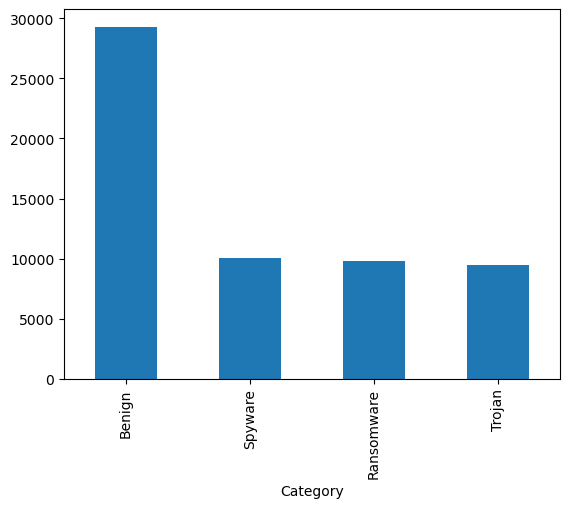

In [11]:
data.Category.value_counts().plot(kind = 'bar');

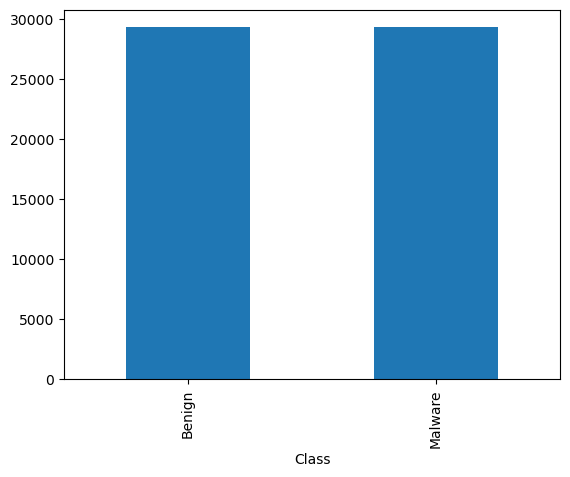

In [12]:
data.Class.value_counts().plot(kind = 'bar');

In [13]:
data.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,handles.nfile,handles.nevent,handles.ndesktop,handles.nkey,handles.nthread,handles.ndirectory,handles.nsemaphore,handles.ntimer,handles.nsection,handles.nmutant,ldrmodules.not_in_load,ldrmodules.not_in_init,ldrmodules.not_in_mem,ldrmodules.not_in_load_avg,ldrmodules.not_in_init_avg,ldrmodules.not_in_mem_avg,malfind.ninjections,malfind.commitCharge,malfind.protection,malfind.uniqueInjections,psxview.not_in_pslist,psxview.not_in_eprocess_pool,psxview.not_in_ethread_pool,psxview.not_in_pspcid_list,psxview.not_in_csrss_handles,psxview.not_in_session,psxview.not_in_deskthrd,psxview.not_in_pslist_false_avg,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_ethread_pool_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_csrss_handles_false_avg,psxview.not_in_session_false_avg,psxview.not_in_deskthrd_false_avg,modules.nmodules,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,899.119513,3572.409960,44.529166,774.280668,928.510086,102.398338,683.339324,130.327855,290.127466,312.588829,60.830347,99.946413,60.832599,0.033170,0.055223,0.033171,7.010274,969.199229,42.282408,1.733699,1.875845,0.002082,2.273500,1.879463,6.276572,3.875589,8.256605,0.040991,0.000080,0.047745,0.041078,0.141784,0.087964,0.187701,137.961465,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,3432.351200,805.460522,5.161254,150.407075,237.817566,9.782695,94.531078,14.965266,144.278832,73.173189,18.761422,21.438482,18.759947,0.009263,0.010112,0.009266,15.390647,6041.620916,92.337061,2.741343,2.995955,0.045582,4.621418,3.017659,4.622047,2.995970,4.736886,0.057563,0.001269,0.066907,0.058216,0.061438,0.055040,0.061534,0.198251,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,266.000000,966.000000,22.000000,284.000000,388.000000,57.000000,296.000000,69.000000,50.000000,118.000000,6.000000,16.000000,6.000000,0.016176,0.040526,0.016176,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.025806,0.008333,0.043750,126.000000,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,646.000000,2923.000000,43.000000,675.000000,708.000000,99.000000,614.000000,120.000000,177.000000,258.000000,46.000000,85.000000,46.000000,0.028846,0.052397,0.028846,3.000000,3.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.048780,0.146341,138.000000,389.000000,221.000000,2

In [14]:
data

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,handles.nfile,handles.nevent,handles.ndesktop,handles.nkey,handles.nthread,handles.ndirectory,handles.nsemaphore,handles.ntimer,handles.nsection,handles.nmutant,ldrmodules.not_in_load,ldrmodules.not_in_init,ldrmodules.not_in_mem,ldrmodules.not_in_load_avg,ldrmodules.not_in_init_avg,ldrmodules.not_in_mem_avg,malfind.ninjections,malfind.commitCharge,malfind.protection,malfind.uniqueInjections,psxview.not_in_pslist,psxview.not_in_eprocess_pool,psxview.not_in_ethread_pool,psxview.not_in_pspcid_list,psxview.not_in_csrss_handles,psxview.not_in_session,psxview.not_in_deskthrd,psxview.not_in_pslist_false_avg,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_ethread_pool_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_csrss_handles_false_avg,psxview.not_in_session_false_avg,psxview.not_in_deskthrd_false_avg,modules.nmodules,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,670,3161,46,716,887,104,671,125,184,257,53,95,53,0.030372,0.054441,0.030372,5,21,30,1.250000,2,0,3,2,7,4,9,0.042553,0.0,0.063830,0.042553,0.148936,0.085106,0.191489,138,389,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,840,3761,51,1011,1030,117,766,148,337,394,77,123,77,0.036167,0.057774,0.036167,12,77,72,1.714286,0,0,0,0,4,2,6,0.000000,0.0,0.000000,0.000000,0.085106,0.042553,0.127660,138,392,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,1050,3996,45,784,1241,100,645,138,369,338,51,89,51,0.026114,0.045571,0.026114,5,6,30,1.250000,0,0,0,0,4,2,5,0.000000,0.0,0.000000,0.000000,0.100000,0.050000,0.125000,137,395,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,630,2961,36,654,792,83,567,127,186,242,31,62,31,0.021483,0.042966,0.021483,2,2,12,1.000000,0,0,0,0,4,2,6,0.000000,0.0,0.000000,0.000000,0.125000,0.062500,0.187500,138,395,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,908,3834,45,1252,942,103,825,135,375,429,102,143,102,0.047820,0.067042,0.047820,12,77,72,2.000000,4,0,4,4,8,6,10,0.086957,0.0,0.086957,0.086957,0.173913,0.130435,0.217391,138,392,222,26,24,118,0,124,87,0,8,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,Ransomware,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,630,2819,40,668,664,92,596,113,161,230,43,79,43,0.029292,0.053815,0.029292,3,3,18,1.000000,1,0,1,1,5,3,7,0.026316,0.0,0.026316,0.026316,0.131579,0.078947,0.184211,138,389,221,26,24,116,0,120,86,0,8,Malware
58592,Ransomware,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,603,2394,39,555,624,91,482,102,111,203,43,79,43,0.030958,0.056875,0.030958,3,3,18,1.000000,0,0,0,0,4,2,6,0.000000,0.0,0.000000,0.000000,0.108108,0.054054,0.162162,138,389,221,26,24,116,0,116,88,0,8,Malware
58593,Ransomware,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,624,2816,40,673,661,92,596,113,167,230,43,79,43,0.029292,0.053815,0.029292,3,3,18,1.000000,2,0,3,2,7,4,9,0.050000,0.0,0.075000,0.050000,0.175000,0.100000,0.225000,138,389,221,26,24,116,0,120,88,0,8,Malware
58594,Ransomware,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,632,2819,40,668,667,92,596,113,161,230,43,79,43,0.029392,0.053999,0.029392,3,3,18,1.000000,0,0,0,0,4,2,6,0.000000,0.0,0.000000,0.000000,0.108108,0.054054,0.16

In [15]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
y_cat =lab.fit_transform(data['Category'])
y_class =lab.fit_transform(data['Class'])
X=data[['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxview.not_in_pslist_false_avg',
       'psxview.not_in_eprocess_pool_false_avg',
       'psxview.not_in_ethread_pool_false_avg',
       'psxview.not_in_pspcid_list_false_avg',
       'psxview.not_in_csrss_handles_false_avg',
       'psxview.not_in_session_false_avg', 'psxview.not_in_deskthrd_false_avg',
       'modules.nmodules', 'svcscan.nservices', 'svcscan.kernel_drivers',
       'svcscan.fs_drivers', 'svcscan.process_services',
       'svcscan.shared_process_services',
       'svcscan.interactive_process_services', 'svcscan.nactive',
       'callbacks.ncallbacks', 'callbacks.nanonymous', 'callbacks.ngeneric']]

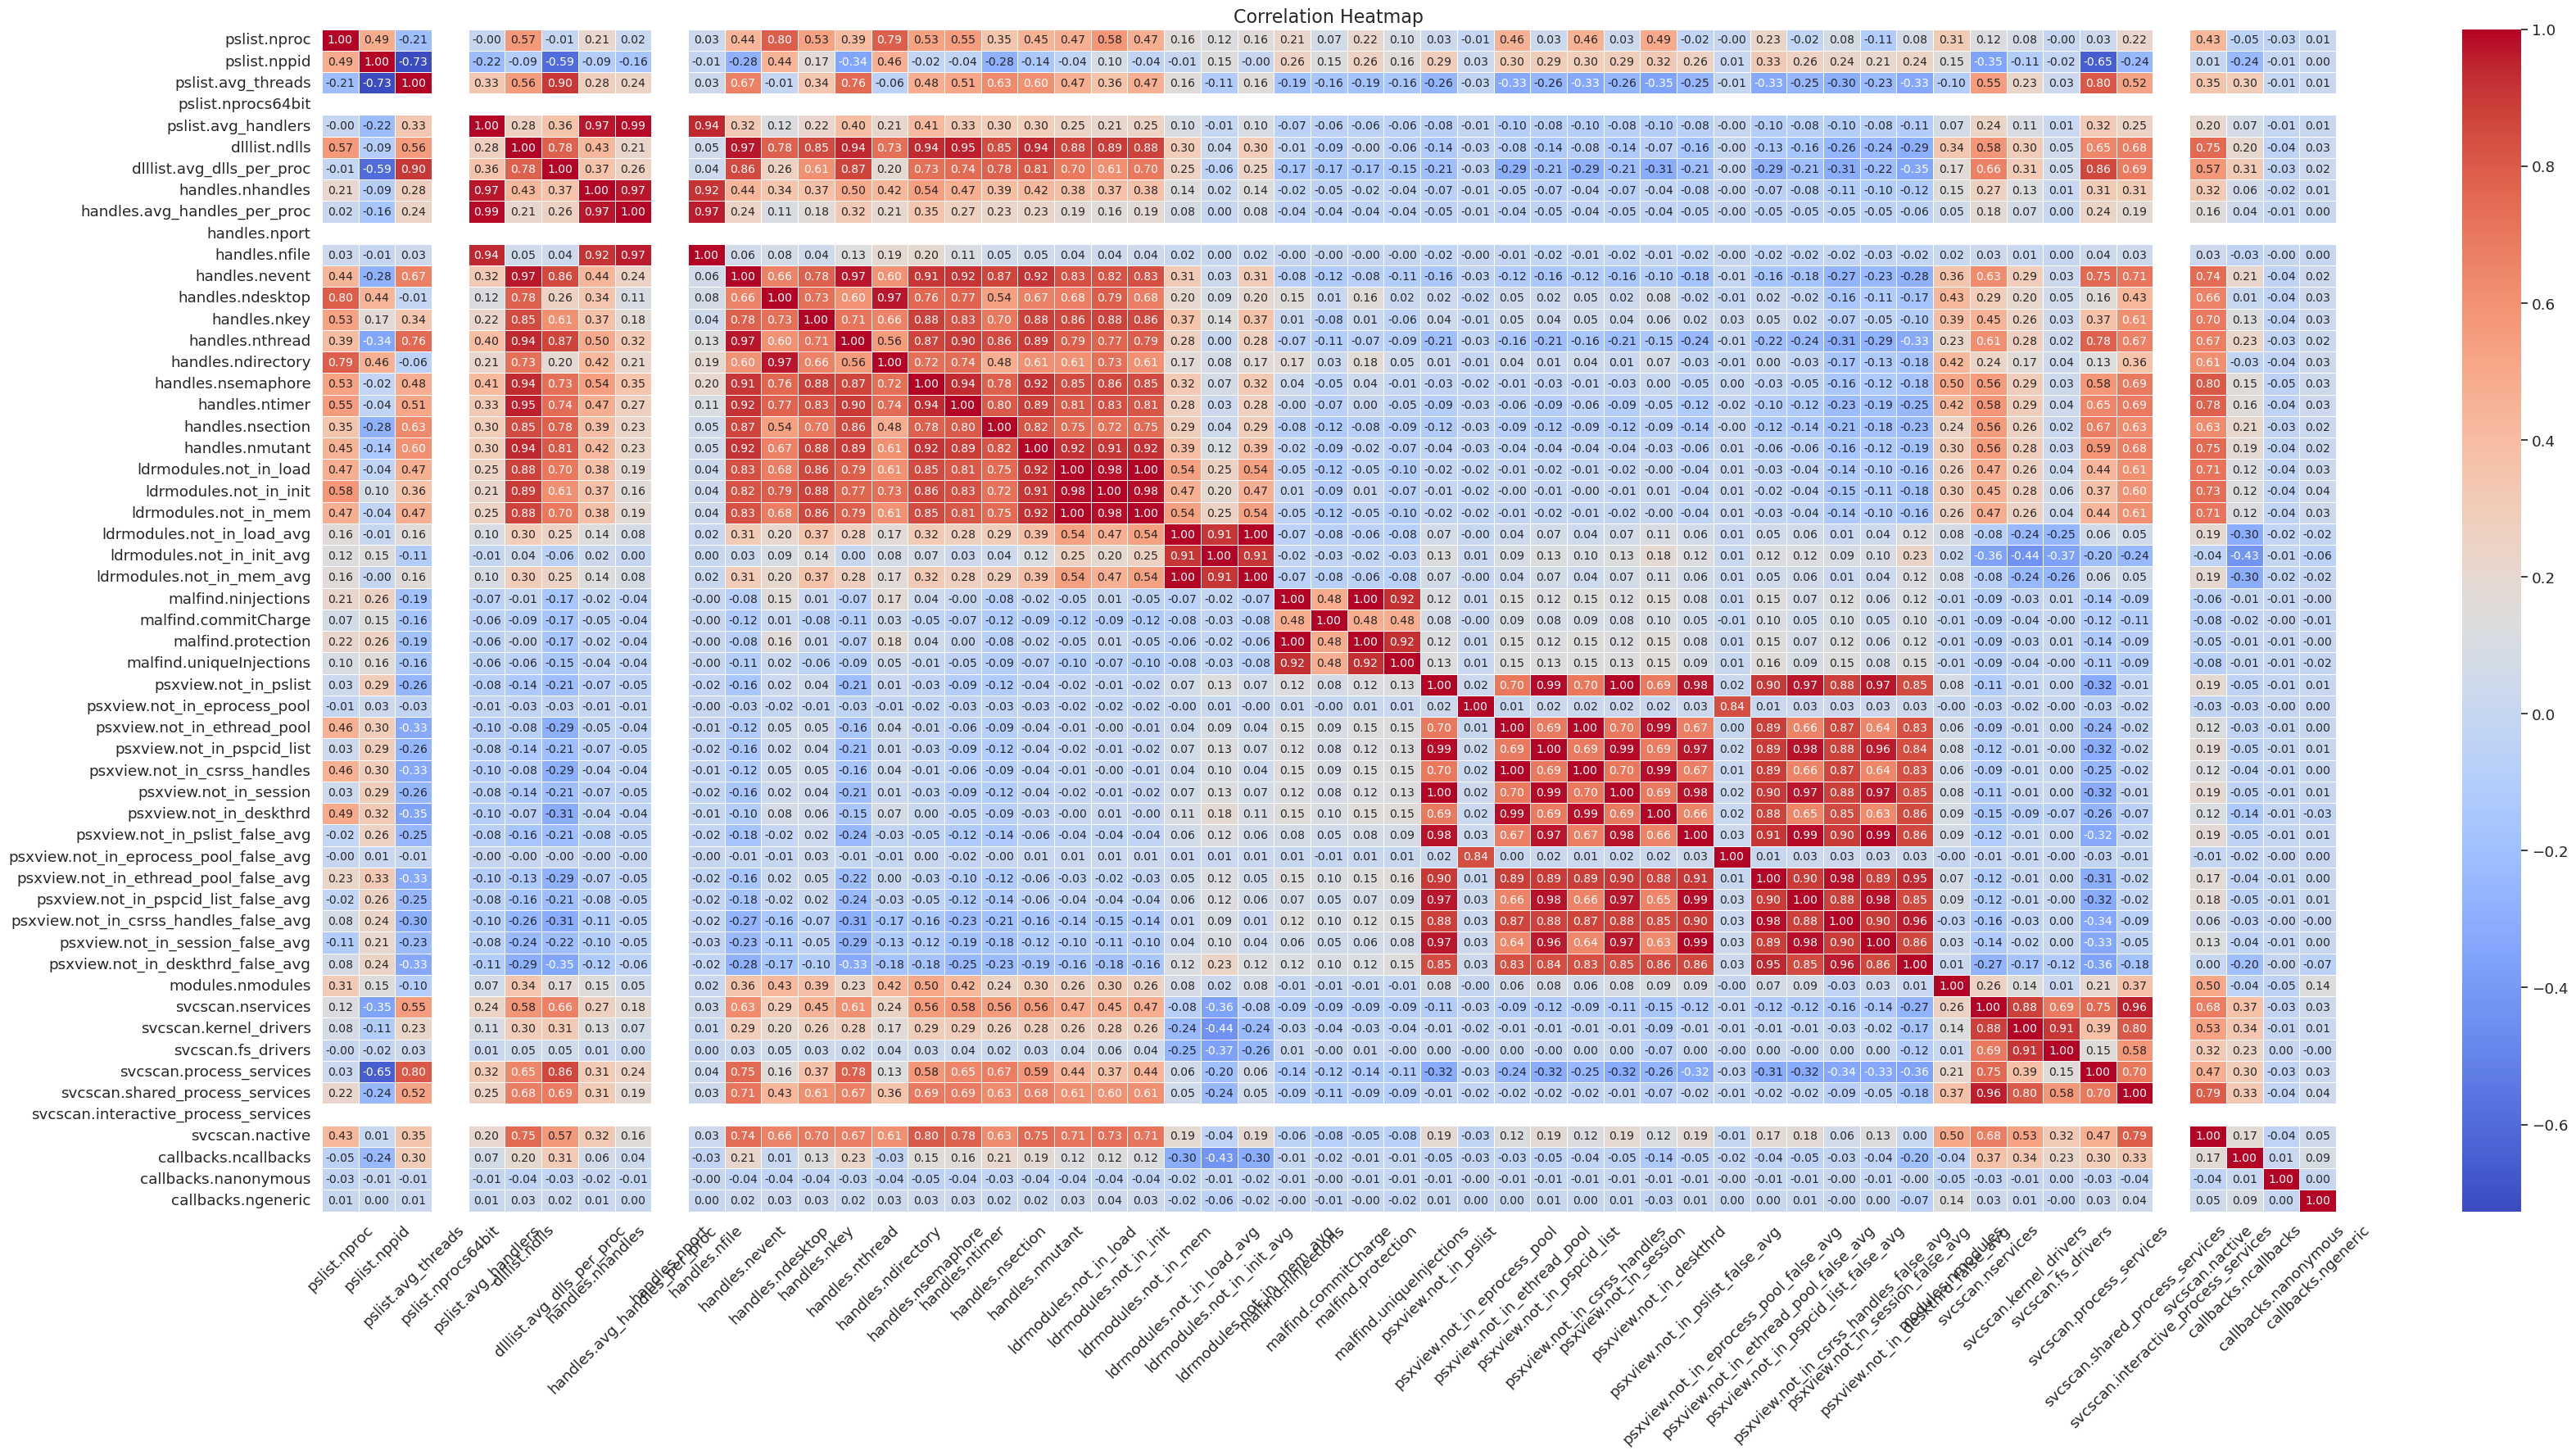

In [16]:
def plot_correlation_heatmap(data):
    # Correlation Analysis
    correlation_matrix = data.corr()

    plt.figure(figsize=(35, 18))  # Adjust the figure size as needed

    # Customize the heatmap appearance
    sns.set(font_scale=1.2)  # Adjust font size for annotations
    sns.set_style("whitegrid")  # Use whitegrid style for better contrast

    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
                          linewidths=0.5, annot_kws={"size": 10})

    # Add a title
    plt.title("Correlation Heatmap", fontsize=16)

    # Rotate the tick labels for better visibility
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # Display the plot
    plt.tight_layout()  # Ensure labels are not cut off
    plt.show()

# Call the function with your dataset
plot_correlation_heatmap(X)

# Model Evaluation

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
  """Function to evaluate model and return the metric of the model
  
  It returns a dictionary with the classification metrics.
  """
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='macro')
  recall = recall_score(y_val, y_pred, average='macro')
  f1 = f1_score(y_val, y_pred, average='macro')
  result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
  return result

def plot_confusion_matrix(y_val, y_pred, label):
  '''function to plot confusion matrix

  Args
  y_val: array. The validation set of the target variable.
  y_pred: array. Model's prediction.
  label: list. A list containing all the classes in the target variable

  Returns
  It returns a plot of the confusion matrix
  '''
  cm = confusion_matrix(y_val, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='', xticks_rotation='vertical')

# class labels
label = list(data['Class'].unique())

# Random Forest Classifier

Random Forest Accuracy: 0.9998862278855453
{'accuracy_score': 0.9998862278855453, 'precision_score': 0.9998840176293203, 'recall_score': 0.9998883803995982, 'f1_score': 0.999886186057561}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8959
           1       1.00      1.00      1.00      8620

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



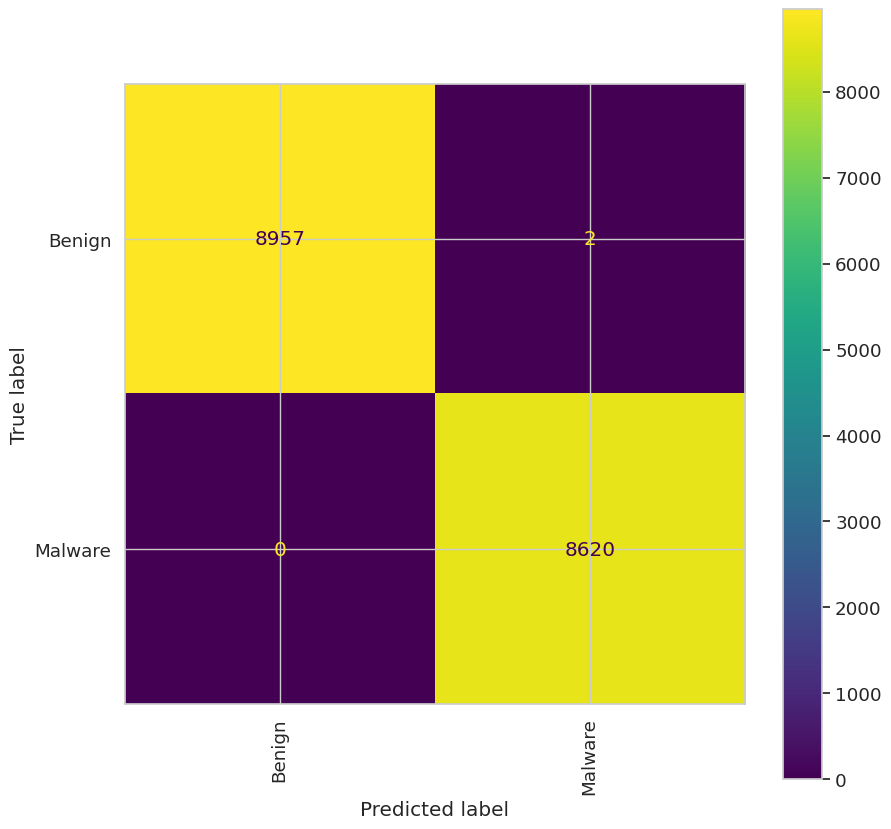

In [21]:
# Machine Learning Model (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_predRf = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_predRf)
print(f'Random Forest Accuracy: {accuracy}')

print(evaluate_model(y_test, y_predRf))
# print(classification_report(y_test, y_predRf))
plot_confusion_matrix(y_test, y_predRf, label)

# Decision Tree CLassifier

{'accuracy_score': 0.9995449115421811, 'precision_score': 0.9995539199286272, 'recall_score': 0.9995359628770302, 'f1_score': 0.9995447341495021}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8959
           1       1.00      1.00      1.00      8620

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



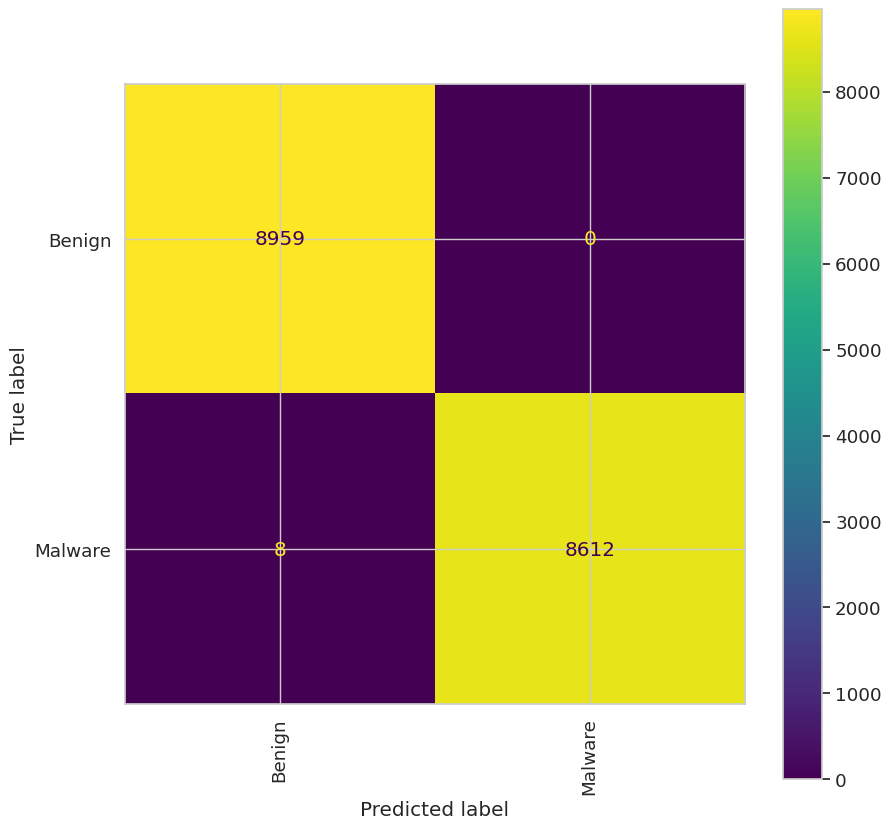

In [22]:
from sklearn.tree import DecisionTreeClassifier

Dt_model = DecisionTreeClassifier(criterion="entropy",
                                             min_samples_split=40,
                                             random_state=0)
Dt_model.fit(x_train, y_train)
y_predDt = Dt_model.predict(x_test)

print(evaluate_model(y_test, y_predDt))
# print(classification_report(y_test, y_predDt))
plot_confusion_matrix(y_test, y_predDt, label)

# xgboost Model

In [18]:
from xgboost import XGBClassifier
x_train,x_test,y_train,y_test=train_test_split(X,y_class, test_size = .3, random_state =1)
# check for the best number of n_estimators
xgboost_model = XGBClassifier(n_estimators=1000, learning_rate=0.1, n_jobs=-1)
xgboost_model.fit(x_train, y_train,
                  early_stopping_rounds=20,
                  eval_set=[(x_test, y_test)],
                  verbose=False)

/home/c4leb/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [19]:
# Evaluate of Validation Data
from sklearn.metrics import mean_squared_error
y_predXgb = xgboost_model.predict(x_test)
print("R Squared XGBoost Regressor: ", xgboost_model.score(x_test, y_test))
print("RMSE of XGBoost Regressor: ", np.sqrt(mean_squared_error(y_test, y_predXgb)))
x = np.sqrt(mean_squared_error(y_test, y_predXgb))

R Squared XGBoost Regressor:  0.9997724557710905
RMSE of XGBoost Regressor:  0.01508456923181747


{'accuracy_score': 0.9997724557710905, 'precision_score': 0.9997723711188558, 'recall_score': 0.9997723711188558, 'f1_score': 0.9997723711188558}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8959
           1       1.00      1.00      1.00      8620

    accuracy                           1.00     17579
   macro avg       1.00      1.00      1.00     17579
weighted avg       1.00      1.00      1.00     17579



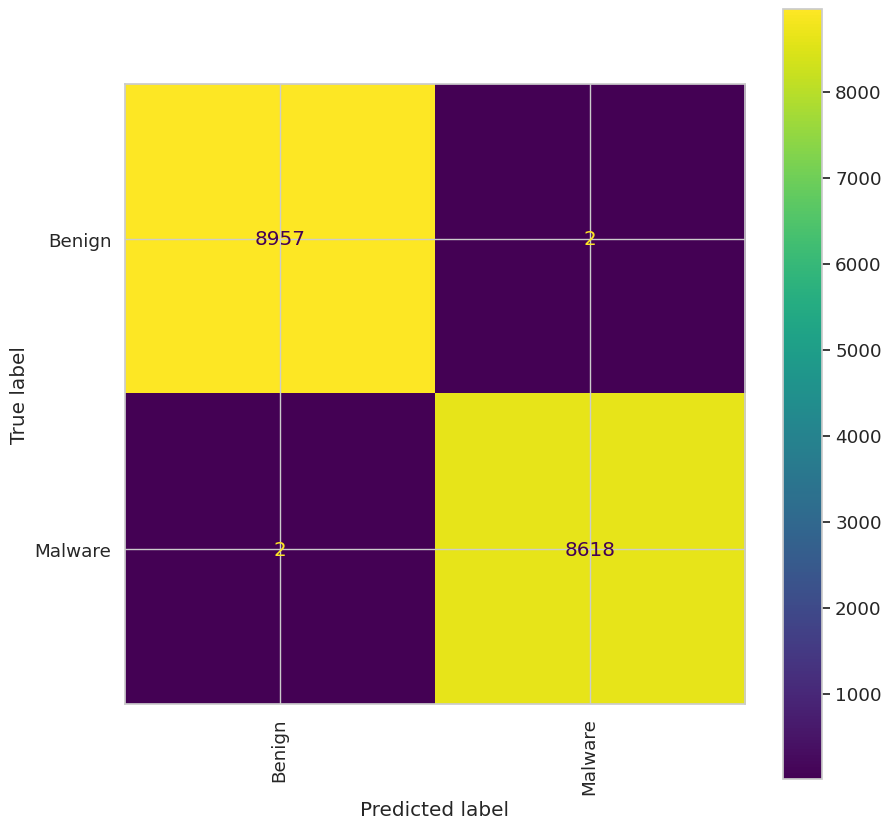

In [20]:
print(evaluate_model(y_test, y_predXgb))
# print(classification_report(y_test, y_predXgb))
plot_confusion_matrix(y_test, y_predXgb, label)

# ANN Model

In [27]:
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data['category']=lab.fit_transform(data['Category'])
data['class']=lab.fit_transform(data['Class'])
x=data[['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxview.not_in_pslist_false_avg',
       'psxview.not_in_eprocess_pool_false_avg',
       'psxview.not_in_ethread_pool_false_avg',
       'psxview.not_in_pspcid_list_false_avg',
       'psxview.not_in_csrss_handles_false_avg',
       'psxview.not_in_session_false_avg', 'psxview.not_in_deskthrd_false_avg',
       'modules.nmodules', 'svcscan.nservices', 'svcscan.kernel_drivers',
       'svcscan.fs_drivers', 'svcscan.process_services',
       'svcscan.shared_process_services',
       'svcscan.interactive_process_services', 'svcscan.nactive',
       'callbacks.ncallbacks', 'callbacks.nanonymous', 'callbacks.ngeneric']]

In [28]:
y=data[['class']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)
print(x_test.shape)

(14649, 55)


In [29]:
from keras.models import Sequential
from keras.layers import Dense
import keras.activations,keras.metrics,keras.losses
model=Sequential()
model.add(Dense(units=x_train.shape[1],input_dim=x.shape[1],activation=keras.activations.sigmoid))
model.add(Dense(units=x_train.shape[1],input_dim=x.shape[1],activation=keras.activations.sigmoid))
model.add(Dense(units=x_train.shape[1],input_dim=x.shape[1],activation=keras.activations.sigmoid))
model.add(Dense(units=x_train.shape[1],input_dim=x.shape[1],activation=keras.activations.sigmoid))
model.add(Dense(units=x_train.shape[1],input_dim=x.shape[1],activation=keras.activations.sigmoid))
model.add(Dense(units=x_train.shape[1],input_dim=x.shape[1],activation=keras.activations.sigmoid))
model.add(Dense(units=x_train.shape[1],input_dim=x.shape[1],activation=keras.activations.sigmoid))
model.add(Dense(units=x_train.shape[1],input_dim=x.shape[1],activation=keras.activations.sigmoid))
model.add(Dense(units=1,activation=keras.activations.sigmoid))
model.compile(optimizer='rmsprop',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=30, epochs=50, validation_data=(x_test, y_test))
# pred=model.predict(x_test)
# print(pred)

Epoch 1/50


2023-09-05 14:58:38.305072: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19336680 exceeds 10% of free system memory.


1465/1465 [==============================] - 5s 3ms/step - loss: 0.6951 - accuracy: 0.5022 - val_loss: 0.6964 - val_accuracy: 0.5039
Epoch 2/50
1465/1465 [==============================] - 4s 3ms/step - loss: 0.6945 - accuracy: 0.4981 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 3/50
1465/1465 [==============================] - 4s 3ms/step - loss: 0.6942 - accuracy: 0.4988 - val_loss: 0.6939 - val_accuracy: 0.4961
Epoch 4/50
1465/1465 [==============================] - 4s 3ms/step - loss: 0.6940 - accuracy: 0.4991 - val_loss: 0.6932 - val_accuracy: 0.5039
Epoch 5/50
1465/1465 [==============================] - 4s 2ms/step - loss: 0.6938 - accuracy: 0.5005 - val_loss: 0.6934 - val_accuracy: 0.4961
Epoch 6/50
1465/1465 [==============================] - 4s 2ms/step - loss: 0.6938 - accuracy: 0.5023 - val_loss: 0.6944 - val_accuracy: 0.5039
Epoch 7/50
1465/1465 [==============================] - 3s 2ms/step - loss: 0.6938 - accuracy: 0.5009 - val_loss: 0.6939 - val_accuracy: 0.5039
Epo

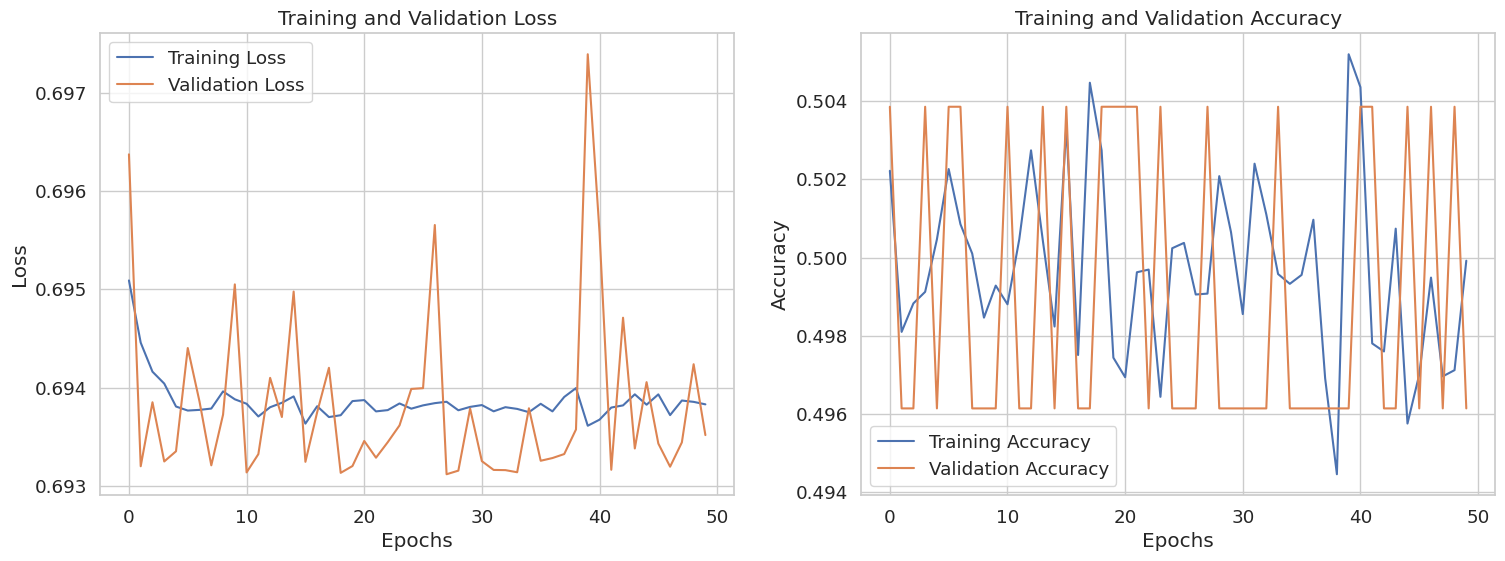

In [30]:
# Access the training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plot the training loss and validation loss
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
